## Clustering in Real World

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.vq import whiten,kmeans,vq

## Color Clustering

In [77]:
# Import image class of matplotlib
import matplotlib.image as img
r =[]
g = []
b = []

# Read batman image and print dimensions
batman_image = img.imread('batman.jpeg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


In [78]:
batman_df = pd.DataFrame({'red':r,'green':g,'blue':b})
scaled_df = data_scaled = pd.DataFrame(whiten(batman_df[['red','green','blue']]),columns=['scaled_red','scaled_green','scaled_blue'])
batman_df = pd.concat([batman_df, scaled_df], axis=1)

In [79]:
batman_df

,red,green,blue,scaled_red,scaled_green,scaled_blue
0,36,28,25,0.695404,0.535343,0.544311
1,39,21,19,0.753354,0.401507,0.413677
2,52,20,21,1.004472,0.382388,0.457221
3,61,27,28,1.178323,0.516223,0.609629
4,37,15,18,0.714721,0.286791,0.391904
...,...,...,...,...,...,...
45456,33,24,27,0.637453,0.458865,0.587856
45457,31,22,25,0.598820,0.420626,0.544311
45458,34,25,28,0.656770,0.477984,0.609629
45459,18,14,15,0.347702,0.267671,0.326587


### How many dominant colors?

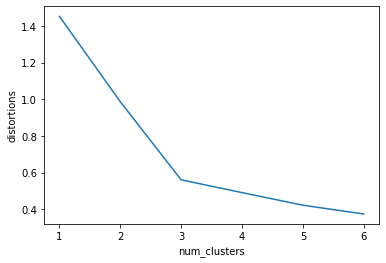

In [80]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_green','scaled_blue']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [81]:
cluster_centers

array([[-0.84355887,  1.28262112,  1.51785619],
       [ 0.10914192,  0.06404167,  0.13946739],
       [ 1.56368741, -1.88485267, -2.04523412],
       [ 0.94579951,  0.73989454,  0.99674672],
       [ 1.61880187, -1.07818982, -0.35332806],
       [ 0.75288898,  1.81517628, -2.27713325]])

### Display dominant colors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


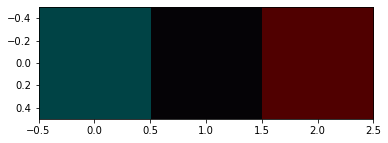

In [82]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()
colors=[]
for cluster_center in cluster_centers[0:3]:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

## Document Clustering